In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar 
import matplotlib.pyplot as plt
import seaborn as sn

In [29]:
# Load the data into a data-frame
oak_svc = pd.read_csv("Service_requests_received_by_the_Oakland_Call_Center__OAK_311_-2.csv")
oak_svc.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State
0,469440,07/10/2013 10:26:10 AM,Phone or Email,Illegal Dumping � mattress/boxspring,ILLDUMP,"(37.82058548282379, -122.27073294626926)",CANCEL,NaN,NaN,6050231.50,2126094.25,CCD3,06X,31ST ST & MARTIN LUTHER KING JR WY,Oakland,CA
1,457153,04/24/2013 08:47:14 AM,Phone or Email,Vegetation Mgmt - Pickup Request,FIRE,"(37.816859510467665, -122.20210911154142)",CLOSED,NaN,04/29/2013 11:16:20 AM,6070025.00,2124370.00,CCD4,22X,2582 EL CAMINITO,Oakland,CA
2,461808,05/21/2013 07:01:58 PM,SeeClickFix,Illegal Dumping � mattress/boxspring,ILLDUMP,"(37.784778775038816, -122.18732747660785)",CLOSED,NaN,05/24/2013 03:05:26 PM,6074083.50,2112613.25,CCD4,25X,BUELL ST & CALAVARAS AV,Oakland,CA
3,462770,05/29/2013 11:26:59 AM,Website,City Bldg - Other,BLDGMAINT,"(37.777418444286276, -122.23081791001138)",CLOSED,NaN,09/12/2013 06:47:11 AM,6061468.02,2110163.16,CCD5,20X,ANIMAL SHELTER,Oakland,CA
4,468471,07/03/2013 03:12:32 PM,Phone or Email,Sewers - Blockage,SEWERS,"(37.82736188318429, -122.19853048351204)",CLOSED,NaN,10/07/2013 10:41:01 AM,6071127.95,2128174.76,CCD4,13Z,2336 PELHAM PL,Oakland,CA


In [30]:
# Convert the DATETIMEINIT and DATETIMECLOSED variables to datetime
oak_svc['DATETIMEINIT'] = oak_svc['DATETIMEINIT'].astype('datetime64[ns]')
oak_svc['DATETIMECLOSED'] = oak_svc['DATETIMECLOSED'].astype('datetime64[ns]')

# Extract the year, month int values
oak_svc['year'] = pd.DatetimeIndex(oak_svc['DATETIMEINIT']).year
oak_svc['month'] = pd.DatetimeIndex(oak_svc['DATETIMEINIT']).month
#oak_svc['month_name'] = oak_svc['DATETIMEINIT'].dt.month_name()
#oak_svc['day'] = pd.DatetimeIndex(oak_svc['DATETIMEINIT']).day

# Get the rounded date time and plain date values
oak_svc['DATETIMEINIT_tr'] = oak_svc['DATETIMEINIT'].dt.round('H')
oak_svc['DATETIMEINIT_dt'] = pd.to_datetime(oak_svc['DATETIMEINIT']).apply(lambda x: x.date())
#oak_svc['DATETIMEINIT_dt'] = pd.to_datetime(oak_svc['DATETIMEINIT_dt'])
 
# Get day of week name and numerical value
#oak_svc['dow_index'] = oak_svc['DATETIMEINIT'].dt.dayofweek
#oak_svc['dow_name'] = oak_svc['DATETIMEINIT_tr'].dt.day_name()
oak_svc['Week_Number'] = oak_svc['DATETIMEINIT_tr'].dt.week

In [31]:
oak_svc['STATUS'] = np.where(oak_svc['STATUS'] == 'Cancel', 'CANCEL', oak_svc['STATUS'])

In [32]:
oak_svc['STATUS'].unique()

array(['CANCEL', 'CLOSED', 'REFERRED', 'UNFUNDED', 'OPEN', 'WOCREATE',
       'EVALUATED - NO FURTHER ACTION', 'GONE ON ARRIVAL',
       'WAITING ON CUSTOMER', 'PENDING'], dtype=object)

In [33]:
# Clean the District Codes
oak_svc['COUNCILDISTRICT'] = np.where((oak_svc['COUNCILDISTRICT'] == 'ccd7') | (oak_svc['COUNCILDISTRICT'] == 'cd 7') | (oak_svc['COUNCILDISTRICT'] == '07'), 'CCD7', oak_svc['COUNCILDISTRICT'])
oak_svc['COUNCILDISTRICT'] = np.where((oak_svc['COUNCILDISTRICT'] == 'ccd1') | (oak_svc['COUNCILDISTRICT'] == '1'), 'CCD1', oak_svc['COUNCILDISTRICT'])
oak_svc['COUNCILDISTRICT'] = np.where(oak_svc['COUNCILDISTRICT'] == 'ccd4', 'CCD4', oak_svc['COUNCILDISTRICT'])
oak_svc['COUNCILDISTRICT'] = np.where(oak_svc['COUNCILDISTRICT'] == 'Piedmont', 'PD1', oak_svc['COUNCILDISTRICT'])
#oak_svc['COUNCILDISTRICT'] = np.where(oak_svc['COUNCILDISTRICT'] == NULL, 'UN1', oak_svc['COUNCILDISTRICT'])
oak_svc['COUNCILDISTRICT'] = oak_svc['COUNCILDISTRICT'].fillna(value="NR1")
# Results of Clean-up
oak_svc['COUNCILDISTRICT'].unique()

array(['CCD3', 'CCD4', 'CCD5', 'NR1', 'CCD7', 'CCD2', 'CCD1', 'CCD6',
       'PD1'], dtype=object)

In [34]:
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '7x', '07X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '9X', '09X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '5Y', '05Y', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '4X', '04X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '2X', '02X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '3Y', '03Y', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '1X', '01X', oak_svc['BEAT'])
#oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == 'nan', 'NC', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '3X', '03X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '8X', '08X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '6X', '06X', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '2Y', '02Y', oak_svc['BEAT'])
oak_svc['BEAT'] = np.where(oak_svc['BEAT'] == '5X', '05X', oak_svc['BEAT'])

In [35]:
oak_svc['BEAT'].unique()

array(['06X', '22X', '25X', '20X', '13Z', '27X', nan, '18Y', '35Y', '16Y',
       '08X', '21Y', '17Y', '30X', '07X', '10Y', '31Z', '26Y', '35X',
       '34X', '14X', '19X', '05Y', '04X', '05X', '03X', '29X', '13X',
       '28X', '32X', '33X', '15X', '32Y', '03Y', '10X', '27Y', '14Y',
       '01X', '24X', '22Y', '02Y', '09X', '17X', '12Y', '11X', '25Y',
       '26X', '31X', '31Y', '13Y', '30Y', '23X', '18X', '16X', '24Y',
       '12X', '02X', '21X', 'LKM1', 'PDT2', 'VAN ECK'], dtype=object)

In [36]:
oak_svc['BEAT'].fillna('nc', inplace=True)

In [37]:
oak_svc.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,...,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,year,month,DATETIMEINIT_tr,DATETIMEINIT_dt,Week_Number
0,469440,2013-07-10 10:26:10,Phone or Email,Illegal Dumping � mattress/boxspring,ILLDUMP,"(37.82058548282379, -122.27073294626926)",CANCEL,NaN,NaT,6050231.50,...,CCD3,06X,31ST ST & MARTIN LUTHER KING JR WY,Oakland,CA,2013,7,2013-07-10 10:00:00,2013-07-10,28
1,457153,2013-04-24 08:47:14,Phone or Email,Vegetation Mgmt - Pickup Request,FIRE,"(37.816859510467665, -122.20210911154142)",CLOSED,NaN,2013-04-29 11:16:20,6070025.00,...,CCD4,22X,2582 EL CAMINITO,Oakland,CA,2013,4,2013-04-24 09:00:00,2013-04-24,17
2,461808,2013-05-21 19:01:58,SeeClickFix,Illegal Dumping � mattress/boxspring,ILLDUMP,"(37.784778775038816, -122.18732747660785)",CLOSED,NaN,2013-05-24 15:05:26,6074083.50,...,CCD4,25X,BUELL ST & CALAVARAS AV,Oakland,CA,2013,5,2013-05-21 19:00:00,2013-05-21,21
3,462770,2013-05-29 11:26:59,Website,City Bldg - Other,BLDGMAINT,"(37.777418444286276, -122.23081791001138)",CLOSED,NaN,2013-09-12 06:47:11,6061468.02,...,CCD5,20X,ANIMAL SHELTER,Oakland,CA,2013,5,2013-05-29 11:00:00,2013-05-29,22
4,468471,2013-07-03 15:12:32,Phone or Email,Sewers - Blockage,SEWERS,"(37.82736188318429, -122.19853048351204)",CLOSED,NaN,2013-10-07 10:41:01,6071127.95,...,CCD4,13Z,2336 PELHAM PL,Oakland,CA,2013,7,2013-07-03 15:00:00,2013-07-03,27


In [64]:
oak_svc_select2 = oak_svc[['REQUESTID','Week_Number','year','COUNCILDISTRICT','STATUS','REQCATEGORY','BEAT','month']].copy()
oak_svc_select2 = oak_svc_select2[oak_svc_select2['year'] != 2009]
oak_svc_select2 = oak_svc_select2[oak_svc_select2['year'] != 2020]

In [101]:
oak_group = oak_svc_select2.groupby(['COUNCILDISTRICT','BEAT','REQCATEGORY','STATUS','year','month','Week_Number'])['REQUESTID'].count().reset_index()
#oak_group = oak_svc_select2.groupby(['COUNCILDISTRICT','REQCATEGORY','STATUS','year','month','Week_Number'])['REQUESTID'].count().reset_index()

In [102]:
final_df = oak_group.sort_values(by=['year','month','Week_Number','COUNCILDISTRICT','BEAT','REQCATEGORY','STATUS'], ascending=True)
#final_df = oak_group.sort_values(by=['year','month','Week_Number','COUNCILDISTRICT','REQCATEGORY','STATUS'], ascending=True)

In [103]:
final_df.head()

,COUNCILDISTRICT,BEAT,REQCATEGORY,STATUS,year,month,Week_Number,REQUESTID
448,CCD1,06X,GRAFFITI,CLOSED,2010,1,1,1
844,CCD1,06X,ILLDUMP,CLOSED,2010,1,1,7
2105,CCD1,06X,RECYCLING,CLOSED,2010,1,1,2
2783,CCD1,06X,TREES,CLOSED,2010,1,1,1
3404,CCD1,08X,ILLDUMP,CLOSED,2010,1,1,1


In [104]:
final_df.to_csv('final_oak23.csv', index=False)

In [105]:
final_df[final_df['STATUS'] == 'PENDING']

,COUNCILDISTRICT,BEAT,REQCATEGORY,STATUS,year,month,Week_Number,REQUESTID
141662,CCD4,13Z,ELECTRICAL,PENDING,2016,8,34,1
164632,CCD4,25X,ELECTRICAL,PENDING,2019,10,43,1
99093,CCD3,04X,ELECTRICAL,PENDING,2019,10,44,1
109210,CCD3,05Y,ELECTRICAL,PENDING,2019,11,45,1
131626,CCD3,14X,ELECTRICAL,PENDING,2019,12,49,1


In [192]:
final_df5 = final_df
final_df5 = final_df5[final_df5['STATUS'] != 'PENDING']
final_df5 = final_df5[final_df5['COUNCILDISTRICT'] != 'NR1']
final_df5 = final_df5[final_df5['BEAT'] != 'nc']
final_df5 = final_df5[final_df5['REQCATEGORY'] != 'GIS']
final_df5 = final_df5[final_df5['REQCATEGORY'] != 'LAB']
final_df5 = final_df5[final_df5['REQCATEGORY'] != 'SURVEY']
final_df5 = final_df5[final_df5['REQCATEGORY'] != 'OPD'] 
final_df5 = final_df5[final_df5['REQCATEGORY'] != 'VEGCONTR']

In [171]:
final_df7 = final_df5.sample(10000)

In [175]:
final_df8 = final_df7
final_df8 = pd.merge(final_df8, req_data, on = 'REQCATEGORY', how ='left')
final_df8 = pd.merge(final_df8, cd_data, on = 'COUNCILDISTRICT', how ='left')
final_df8 = pd.merge(final_df8, beat_data, on = 'BEAT', how ='left')
final_df8 = pd.merge(final_df8, status_data, on = 'STATUS', how ='left')
final_df8 = final_df8[['year','month','Week_Number','city_council_enc','beat_enc','request_category_enc','REQUESTID','status_enc']]
final_df6.head()

,year,month,Week_Number,city_council_enc,beat_enc,request_category_enc,REQUESTID,status_enc
0,2010,1,1,0,8,8,1,1
1,2010,1,1,0,8,10,7,1
2,2010,1,1,0,8,19,2,1
3,2010,1,1,0,8,28,1,1
4,2010,1,1,0,10,10,1,1


In [170]:
print('Dataframe size: ', final_df5.shape)

Dataframe size:  (274405, 8)


In [182]:
final_df7.head()

,COUNCILDISTRICT,BEAT,REQCATEGORY,STATUS,year,month,Week_Number,REQUESTID
185729,CCD5,20X,TREES,UNFUNDED,2017,3,10,1
228688,CCD6,30X,ILLDUMP,CLOSED,2014,12,51,12
17458,CCD1,10Y,TRAFFIC_ENGIN,CLOSED,2013,2,6,1
234754,CCD6,30Y,SEWERS,CLOSED,2019,10,40,1
82025,CCD3,01X,GRAFFITI,CLOSED,2012,12,50,2


In [183]:
final_df8.head()

,year,month,Week_Number,city_council_enc,beat_enc,request_category_enc,REQUESTID,status_enc
0,2017,3,10,4,30,28,1,7
1,2014,12,51,5,46,10,12,1
2,2013,2,6,0,13,27,1,1
3,2019,10,40,5,47,23,1,1
4,2012,12,50,2,0,8,2,1


In [185]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [220]:
X_test = df_test[['year','month','Week_Number','REQUESTID','BEAT','COUNCILDISTRICT','STATUS']]
y_test = df_test['REQUESTID']

In [215]:
mask = np.random.rand(len(final_df7)) < 0.7
df_train = final_df7[mask]
df_test = final_df7[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=7024
Testing data set length=2976


In [219]:
poisson = glm('REQUESTID ~ COUNCILDISTRICT + BEAT +REQCATEGORY + STATUS + year + month + Week_Number ', data = df_train, family = sm.families.Poisson()).fit()
negbinom = glm('REQUESTID ~ COUNCILDISTRICT + BEAT +REQCATEGORY + STATUS + year + month + Week_Number ', data = df_train,  family=sm.families.NegativeBinomial()).fit()
#modelnb = glm(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

In [223]:
poisson.score(X_test, y_test)
#print((negbinom.score(X_test, y_test))

AttributeError: 'GLMResults' object has no attribute 'score'

In [ ]:
estimators = []
model1 = model = glm('REQUESTID ~ COUNCILDISTRICT + BEAT +REQCATEGORY + STATUS + year + month + Week_Number ', data = final_df5,
family = sm.families.Poisson())
estimators.append(('poisson', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()

In [157]:
final_df5.to_csv('final_oak5.csv', index=False)

In [58]:
oak_group3 = oak_svc_select2.groupby(['year','month','Week_Number'])['REQUESTID'].count().reset_index()
oak_group3 = oak_group3[oak_group3['year'] != 2009]
oak_group3 = oak_group3[oak_group3['year'] != 2020]
oak_group3.to_csv('final_oak1.csv', index=False)

In [73]:

oak_group3 = oak_svc_select2.groupby(['COUNCILDISTRICT'])['REQUESTID'].count().reset_index()
oak_group3

,COUNCILDISTRICT,REQUESTID
0,CCD1,77356
1,CCD2,88517
2,CCD3,155424
3,CCD4,68314
4,CCD5,72645
5,CCD6,63362
6,CCD7,87920
7,NR1,36259
8,PD1,193


In [113]:
feature_names = ['year','Week_Number','REQCATEGORY','BEAT','COUNCILDISTRICT','STATUS','month']
target_name = 'REQUESTID'
X = final_df5[feature_names]
y = final_df5[target_name]

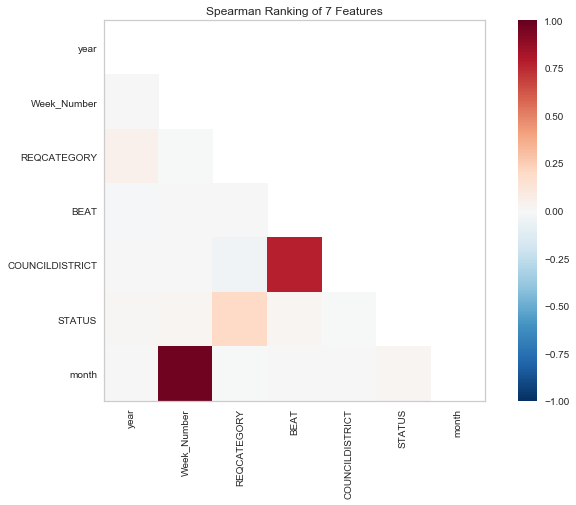

In [114]:
# Import Rank2D
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
plt.rcParams['figure.figsize'] = (12, 7)
visualizer = Rank2D(features=feature_names, algorithm='spearman')
visualizer.fit(X, y)                
visualizer.transform(X)             
visualizer.poof()

In [79]:
import statsmodels.api as sm
from statsmodels.formula.api import glm

In [203]:
model = glm('REQUESTID ~ COUNCILDISTRICT + BEAT +REQCATEGORY + STATUS + year + month + Week_Number ', data = final_df5, family = sm.families.Poisson()).fit()

In [201]:
model = glm('REQUESTID ~ city_council_enc + beat_enc +request_category_enc + status_enc + year + month + Week_Number ', data = final_df5,
family = sm.families.Poisson()).fit()

In [202]:
ratio = model.pearson_chi2 / model.df_resid
print(ratio)

3.268813115163567


In [217]:
modelnb = glm('REQUESTID ~ COUNCILDISTRICT + BEAT +REQCATEGORY + STATUS + year + month + Week_Number ', data = final_df5, family=sm.families.NegativeBinomial()).fit()

In [218]:
ratio = modelnb.pearson_chi2 / modelnb.df_resid
print(ratio)

0.42851760982666914


In [193]:
le = preprocessing.LabelEncoder()

# Get the list of opponents
beat_list = list(final_df['BEAT'].unique())
cd_list = list(final_df['COUNCILDISTRICT'].unique())
req_list = list(final_df['REQCATEGORY'].unique())
status_list = list(final_df['STATUS'].unique())

# Encode the lists
labels_beat = le.fit_transform(beat_list)
labels_req = le.fit_transform(req_list)
labels_cd = le.fit_transform(cd_list)
labels_status = le.fit_transform(status_list)

data_req = {'REQCATEGORY': req_list, 'request_category_enc':labels_req}
data_cd = {'COUNCILDISTRICT': cd_list, 'city_council_enc':labels_cd}
data_beat = {'BEAT': beat_list, 'beat_enc':labels_beat}
data_status = {'STATUS': status_list, 'status_enc':labels_status}

req_data = pd.DataFrame(data_req)
beat_data = pd.DataFrame(data_beat)
cd_data = pd.DataFrame(data_cd)
status_data = pd.DataFrame(data_status)
#opp_data = opp_data.drop_duplicates()


In [194]:
status_data

,STATUS,status_enc
0,CLOSED,1
1,UNFUNDED,7
2,CANCEL,0
3,REFERRED,6
4,WOCREATE,9
5,OPEN,4
6,EVALUATED - NO FURTHER ACTION,2
7,GONE ON ARRIVAL,3
8,PENDING,5
9,WAITING ON CUSTOMER,8


In [195]:
final_df5 = pd.merge(final_df5, req_data, on = 'REQCATEGORY', how ='left')

In [196]:
final_df5 = pd.merge(final_df5, cd_data, on = 'COUNCILDISTRICT', how ='left')

In [197]:
final_df5 = pd.merge(final_df5, beat_data, on = 'BEAT', how ='left')

In [198]:
final_df5 = pd.merge(final_df5, status_data, on = 'STATUS', how ='left')

In [199]:
final_df6 = final_df5[['year','month','Week_Number','city_council_enc','beat_enc','request_category_enc','REQUESTID','status_enc']]
final_df6.head()

,year,month,Week_Number,city_council_enc,beat_enc,request_category_enc,REQUESTID,status_enc
0,2010,1,1,0,8,8,1,1
1,2010,1,1,0,8,10,7,1
2,2010,1,1,0,8,19,2,1
3,2010,1,1,0,8,28,1,1
4,2010,1,1,0,10,10,1,1


In [163]:
final_df6.to_csv('final_oak2.csv', index=False)

In [23]:
feature_names2 = ['year','Week_Number','request_category_enc','beat_enc','city_council_enc','REQUESTID','month']
target_name2 = 'STATUS'
X2 = final_df2[feature_names2]
y2 = final_df2[target_name2]

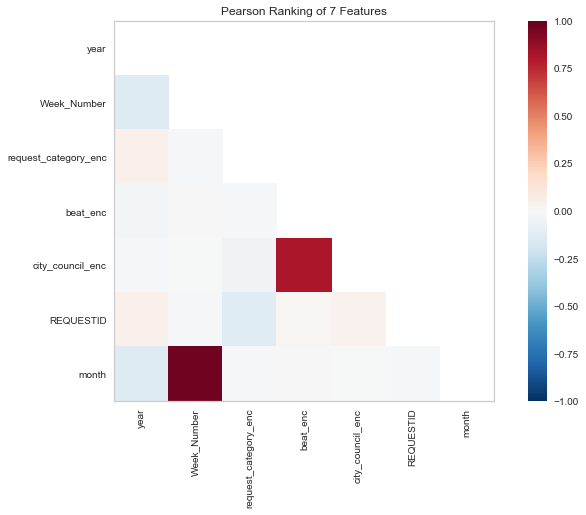

In [24]:
# Import Rank2D
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
plt.rcParams['figure.figsize'] = (12, 7)
visualizer = Rank2D(features=feature_names2, algorithm='pearson')
visualizer.fit(X2, y2)                
visualizer.transform(X2)             
visualizer.poof()

In [82]:
final_df3 = final_df2.sample(10000)

In [26]:
from sklearn import svm

In [27]:
svm_model_X = final_df[['year','month','Week_Number','request_category_enc','beat_enc','city_council_enc','REQUESTID']]

In [28]:
svm_model_y = final_df3['STATUS']

In [227]:
counts_modelX = final_df8[['year','month','Week_Number','request_category_enc','beat_enc','city_council_enc','status_enc']]
counts_modely = final_df8['REQUESTID']

In [228]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(counts_modelX, counts_modely, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of rows in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of rows in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  7000
No. of samples in validation set: 3000


No. of rows in the training set:
1     4316
2     1176
3      517
4      264
5      191
6      111
7       95
8       64
9       51
11      32
12      29
10      26
13      22
14      22
15      14
16      14
20       7
19       7
21       6
18       6
17       5
22       3
30       3
28       3
24       2
31       2
26       2
38       2
25       1
23       1
36       1
93       1
27       1
34       1
46       1
37       1
Name: REQUESTID, dtype: int64


No. of rows in the validation set:
1     1832
2      512
3      226
4      109
5       67
6       53
8       45
9       31
7       27
11      16
10      15
12      13
13      12
14      10
15       9
17       4
16       3
18       2
36       2
24       2
26       2
23       2
20       1
32       1
33       1
19       1
29       1
39       1
Name: REQUESTID, dtype: int64


In [230]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=100)

In [231]:
rf2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [232]:
y_pred=rf2.predict(X_val)

In [234]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.582


In [93]:
array = confusion_matrix(y_val,y_pred)

In [97]:
array


array([[1699,  100,   27,    7,    9,    5,    3,    2,    1,    0,    0,
           1,    0,    1,    0,    2,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [ 425,   50,   16,   11,    4,    5,    2,    3,    1,    0,    0,
           1,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    0],
       [ 136,   30,   12,    8,    7,    3,    5,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  74,   17,   10,    7,    1,    0,    1,    2,    1,    0,    0,
           1,    0,    0,    1,    0,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  35,    9,    5,    6,    2,    2,    1,    1,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
     

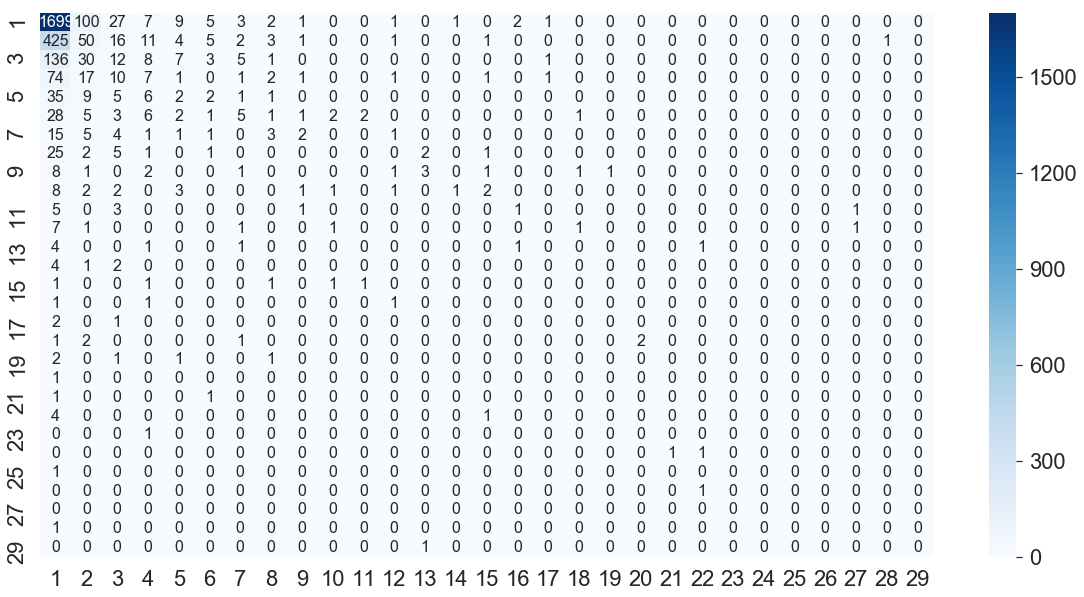

In [100]:
# Generate a confusion matrix using predicted y values against the y from the validation set
array = confusion_matrix(y_val,y_pred)
# Create the classes - In this case Average against Best performance
classes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
# Create a dataframe from the confusion matrix array and the the classes
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
# Generate the visual matrix using a Seaborn Heat Map
plt.figure(figsize = (20,10))
sn.set(font_scale=2)
sn.set_palette("husl")
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

In [29]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

In [30]:
# split the data
X1_train, X1_val, y1_train, y1_val = train_test_split(svm_model_X, svm_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X1_train.shape[0])
print("No. of samples in validation set:", X1_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of rows in the training set:')
print(y1_train.value_counts())

print('\n')
print('No. of rows in the validation set:')
print(y1_val.value_counts())

No. of samples in training set:  7000
No. of samples in validation set: 3000


No. of rows in the training set:
CLOSED                           4379
CANCEL                           1140
REFERRED                          598
OPEN                              516
UNFUNDED                          143
EVALUATED - NO FURTHER ACTION      84
WOCREATE                           73
PENDING                            32
GONE ON ARRIVAL                    30
WAITING ON CUSTOMER                 5
Name: STATUS, dtype: int64


No. of rows in the validation set:
CLOSED                           1889
CANCEL                            476
REFERRED                          255
OPEN                              217
UNFUNDED                           62
EVALUATED - NO FURTHER ACTION      36
WOCREATE                           31
PENDING                            23
GONE ON ARRIVAL                     8
WAITING ON CUSTOMER                 3
Name: STATUS, dtype: int64


In [36]:
# Feature scaling.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1_train)

X1_train = scaler.transform(X1_train)
X1_val = scaler.transform(X1_val)

In [37]:
clf_svm = svm.SVC(probability=True)

clf_svm.fit(X1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [38]:
y_pred1=clf_svm.predict(X1_val)

In [39]:
# Import sklearn library and dependencies
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_val, y_pred1))

Accuracy: 0.6296666666666667


In [40]:
y_pred1

array(['CLOSED', 'CLOSED', 'CLOSED', ..., 'CLOSED', 'CLOSED', 'CLOSED'],
      dtype=object)

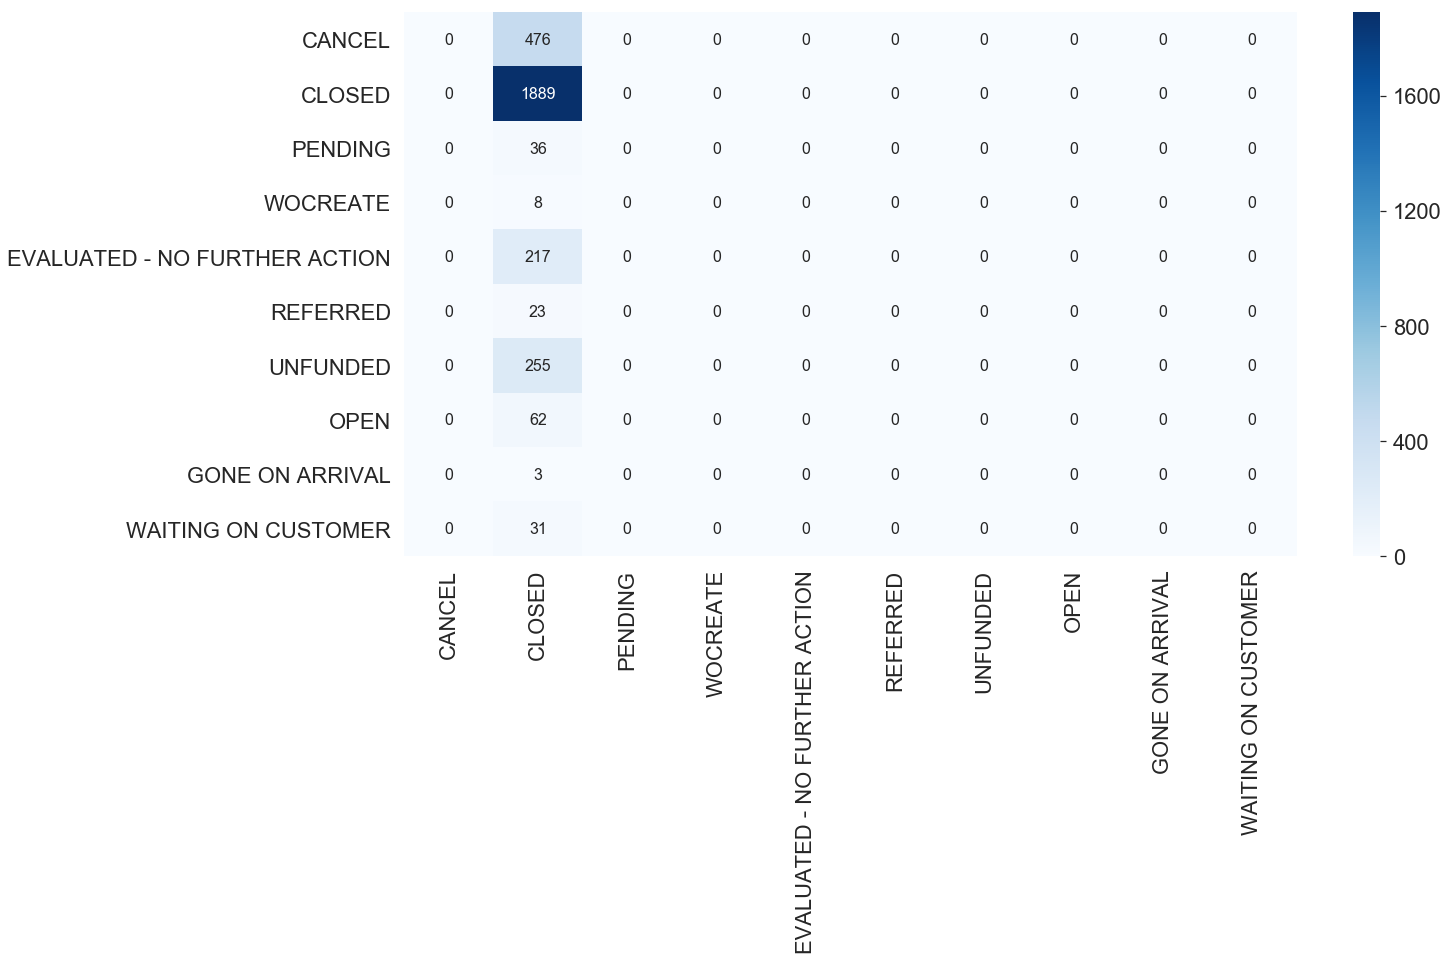

In [41]:
# Generate a confusion matrix using predicted y values against the y from the validation set
array = confusion_matrix(y1_val,y_pred1)
# Create the classes - In this case Average against Best performance
classes = list(final_df3['STATUS'].unique())
# Create a dataframe from the confusion matrix array and the the classes
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
# Generate the visual matrix using a Seaborn Heat Map
plt.figure(figsize = (20,10))
sn.set(font_scale=2)
sn.set_palette("husl")
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

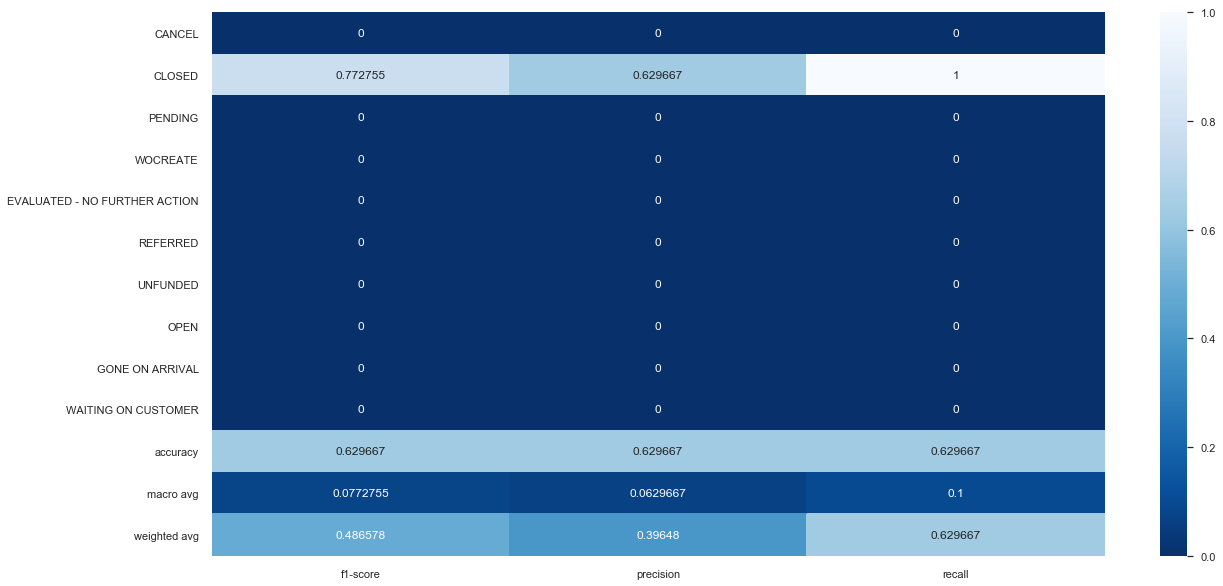

In [42]:
# Create the clasification report
clf_log = classification_report(y1_val, y_pred1, target_names= classes, output_dict=True)
# Create the visualization
plt.figure(figsize = (20,10))
sn.set(font_scale=1)
sn.heatmap(pd.DataFrame(clf_log).iloc[:-1, :].T, annot=True, cmap="Blues_r", fmt='g')

/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


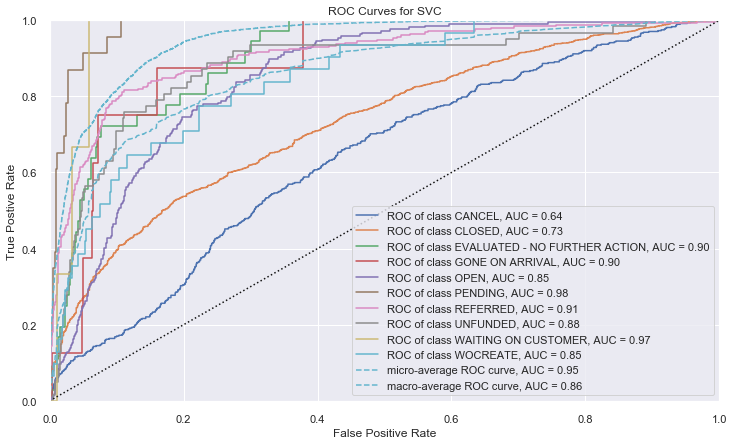

In [44]:
# ROC and AUC
#Instantiate the visualizer
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(clf_svm)

visualizer.fit(X1_train, y1_train)  # Fit the training data to the visualizer
visualizer.score(X1_val, y1_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_forest = RandomForestClassifier(n_estimators=100)

In [50]:
random_forest.fit(X1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
y_pred2=random_forest.predict(X1_val)

In [52]:
y_pred2

array(['CLOSED', 'CLOSED', 'CLOSED', ..., 'CLOSED', 'CLOSED', 'CLOSED'],
      dtype=object)

/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ambrosemmalagon-cordero/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

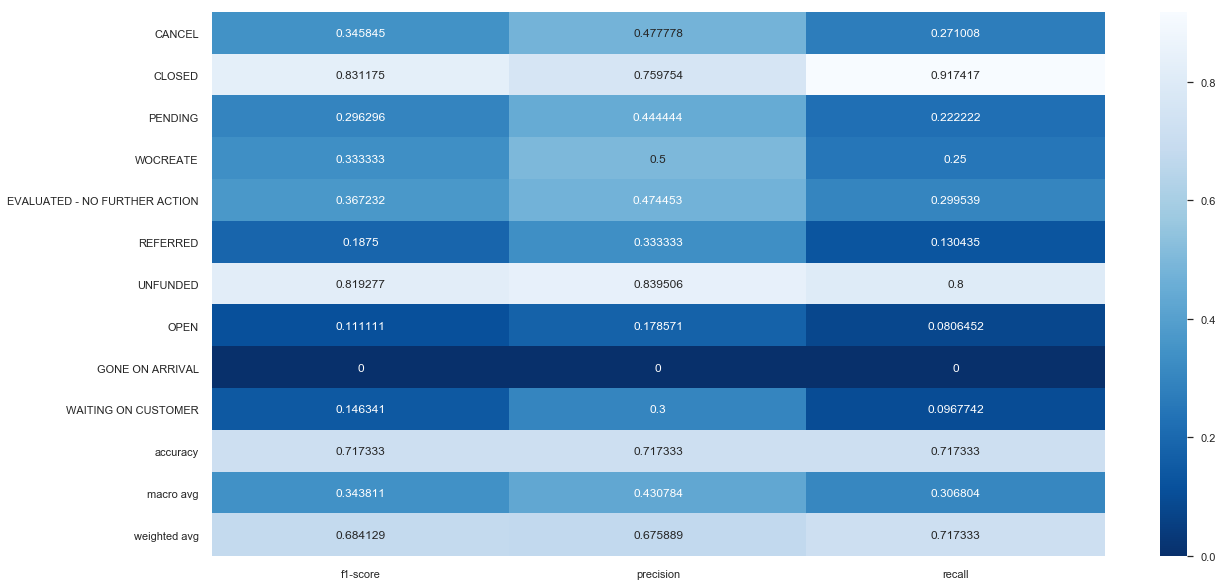

In [53]:
# Create the clasification report
clf_log = classification_report(y1_val, y_pred2, target_names= classes, output_dict=True)
# Create the visualization
plt.figure(figsize = (20,10))
sn.set(font_scale=1)
sn.heatmap(pd.DataFrame(clf_log).iloc[:-1, :].T, annot=True, cmap="Blues_r", fmt='g')

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

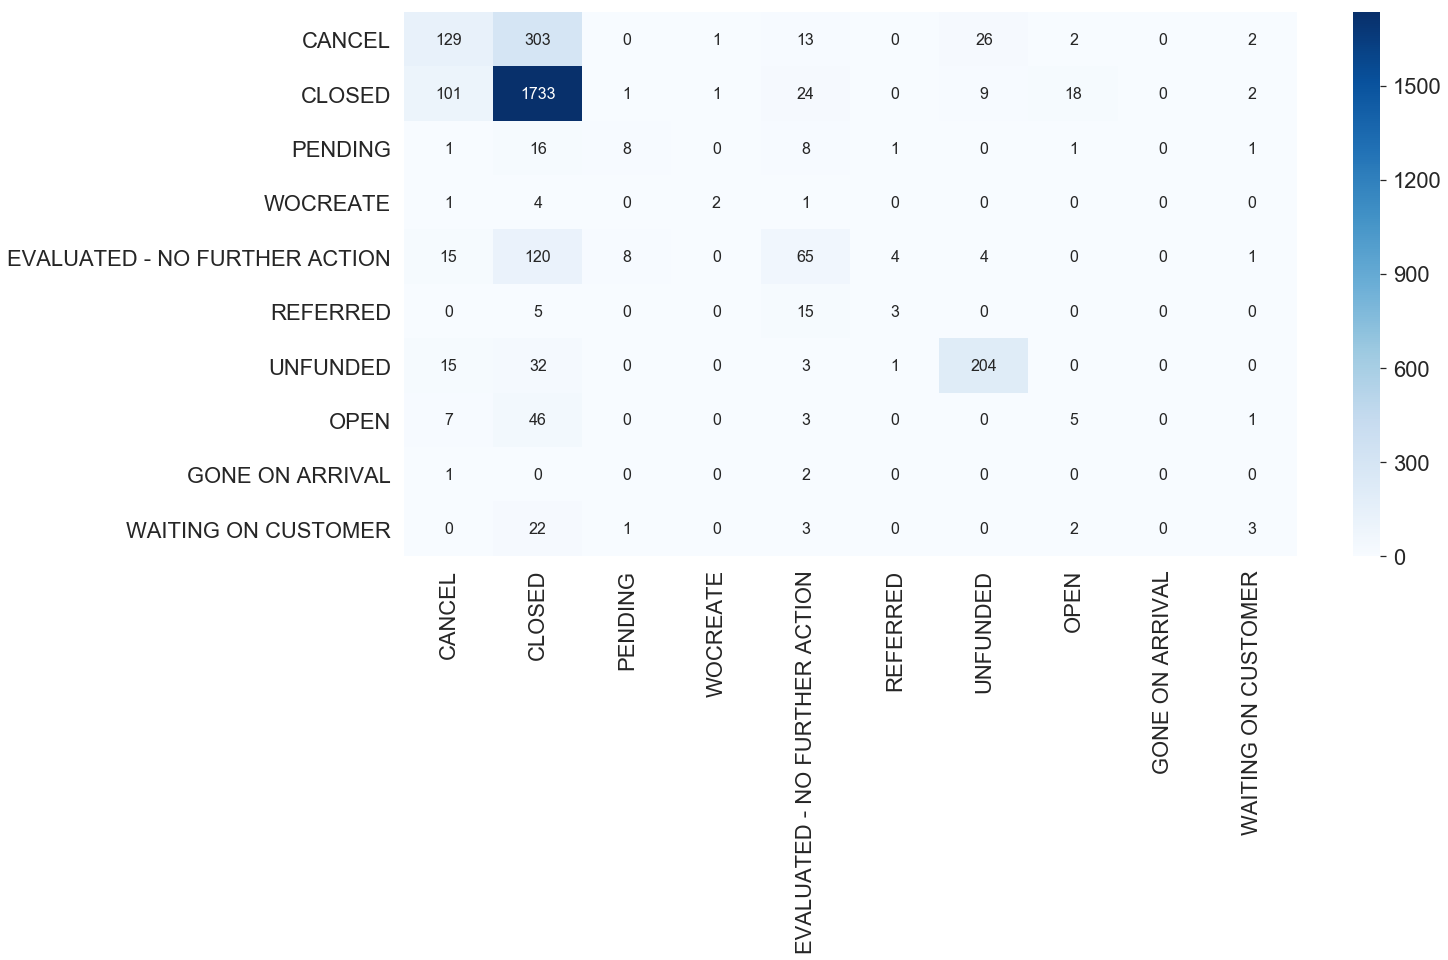

In [54]:
# Generate a confusion matrix using predicted y values against the y from the validation set
array = confusion_matrix(y1_val,y_pred2)
# Create the classes - In this case Average against Best performance
classes = list(final_df3['STATUS'].unique())
# Create a dataframe from the confusion matrix array and the the classes
df_cm = pd.DataFrame(array, index = [i for i in classes],
                  columns = [i for i in classes])
# Generate the visual matrix using a Seaborn Heat Map
plt.figure(figsize = (20,10))
sn.set(font_scale=2)
sn.set_palette("husl")
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

In [55]:
# Import sklearn library and dependencies
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_val, y_pred2))

Accuracy: 0.7173333333333334


In [56]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp.fit(X1_train,y1_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [57]:
# Create the predictions
predictions = mlp.predict(X1_val)

In [59]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_val, predictions))

Accuracy: 0.71


In [ ]:
oak_group2 = o.copy

In [51]:
oak_group2 = oak_svc
oak_group3 = oak_group2.groupby(['year'])['REQUESTID'].count().reset_index()
oak_group3 = oak_group3[oak_group3['year'] != 2009]
oak_group3 = oak_group3[oak_group3['year'] != 2020]

Text(0.5, 1.0, 'Total Submitted Service Requests per Year')

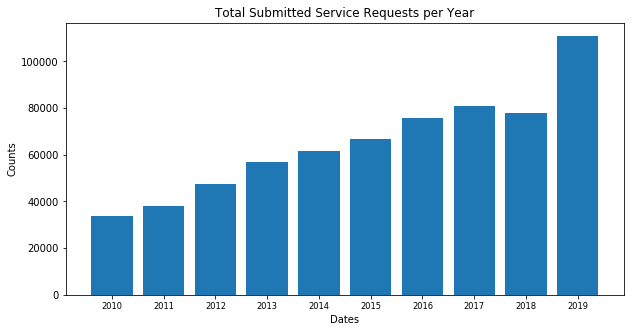

In [53]:
#request_count_3 = oak_svc.groupby(['DATETIMEINIT_dt'], as_index=False).count()
plt.rcParams['figure.figsize'] = (10, 5)
#plt.hist(request_count_2["REQUESTID"], bins=50)
#plt.plot_date(oak_group3["month_year"], oak_group3["REQUESTID"], alpha=0.5)
plt.bar(range(len(oak_group3.REQUESTID)), oak_group3.REQUESTID, align='center')
plt.xticks(range(len(oak_group3.REQUESTID)), oak_group3.year, size='small')
plt.ylabel('Counts')
plt.xlabel('Dates')
plt.title("Total Submitted Service Requests per Year")

In [54]:
oak_group3.to_csv("year_oak.csv")